https://boyangzhao.github.io/posts/mcmc-bayesian-inference

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import arviz as az

In [10]:
# generate observed data
X = st.norm(loc=2, scale=1).rvs(size=1000)

(array([  4.,  29., 100., 230., 282., 224., 102.,  26.,   2.,   1.]),
 array([-1.21720618, -0.491672  ,  0.23386218,  0.95939635,  1.68493053,
         2.41046471,  3.13599889,  3.86153307,  4.58706724,  5.31260142,
         6.0381356 ]),
 <BarContainer object of 10 artists>)

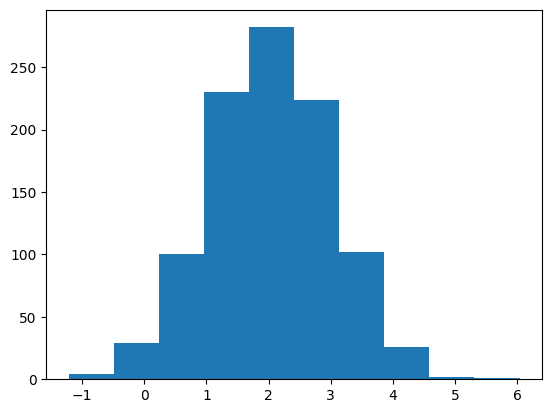

In [11]:
plt.hist(X)

Multiprocess sampling (5 chains in 4 jobs)
Metropolis: [mu]


/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/home/singh087/UofG/work/Code/HMtest/lib/python3.10/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 5 chains for 1_000 tune and 5_000 draw iterations (5_000 + 25_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>]],
      dtype=object)

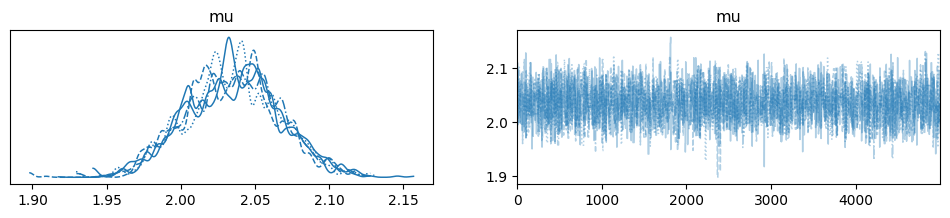

In [12]:
import pymc3 as pm

with pm.Model() as model:

    prior = pm.Normal('mu', mu=0, sigma=1)  # prior
    obs = pm.Normal('obs', mu=prior, sigma=1, observed=X)  # likelihood
    step = pm.Metropolis()
 
    # sample with 3 independent Markov chains
    trace = pm.sample(draws=5000, chains=5, step=step, return_inferencedata=True)  

az.plot_trace(trace, var_names=('mu'))

In [16]:
az.summary(trace, var_names=["mu"])["mean"]

mu    2.035
Name: mean, dtype: float64